In [21]:
import itertools

import numpy as np
import pandas as pd

import altair as alt

import bokeh.io

import bebi103
import altair_catplot as altcat

bokeh.io.output_notebook()

Loading BokehJS ...

In [22]:
pwd

'/Users/chenxinhong'

In [90]:
df = pd.read_csv('./data/130315_1A_aanat2_resampled.csv', comment = '#')
df.head()

,location,time,activity,zeit,zeit_ind,day,genotype,light
0,1,2013-03-15 18:30:00,85.888889,-14.500000,-869,4,het,True
1,1,2013-03-15 18:40:00,4.500000,-14.333333,-860,4,het,True
2,1,2013-03-15 18:50:00,0.000000,-14.166667,-850,4,het,True
3,1,2013-03-15 19:00:00,0.000000,-14.000000,-840,4,het,True
4,1,2013-03-15 19:10:00,0.000000,-13.833333,-830,4,het,True


In [24]:
def plot_trace(df, col='activity', location=1, units='sec/min'):
    """Plot a trace, coloring by light."""
    charts = []
    for day, light in itertools.product(df['day'].unique(), 
                                        df['light'].unique()):
        inds = ( (df['location'] == location) 
                & (df['day'] == day) 
                & (df['light'] == light))

        charts.append(
            alt.Chart(df.loc[inds, ['zeit', col, 'light']],
                  height=200,
                  width=500
                ).mark_line(
                    strokeWidth=1,
                    strokeJoin='bevel'
                ).encode(
                    x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
                    y=alt.Y(f'{col}:Q', title=f'activity ({units})'),
                    color='light:N',
                    order='zeit:Q'
            )
        )

    return alt.layer(*charts)


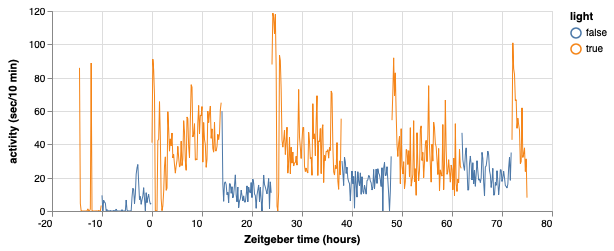

In [25]:
plot_trace(df, col='activity', location=1, units='sec/10 min')

In [39]:
# 'high acitive state' : > 10s/10minute
# 'low active state' :   > 0 $ < 10s/10minute

In [45]:
# define a function that use the condion of activity to generate a new column

def label_activity(c):
    if c['activity'] > 10:
        return'high'
    if (c['activity'] <= 10) & (c['activity'] > 0):
        return'low'
    if c['activity'] == 0:
        return'in'

In [52]:
df['type'] = df.apply(label_activity, axis = 1)
df.head()

,location,time,activity,zeit,zeit_ind,day,genotype,light,type
0,1,2013-03-15 18:30:00,85.888889,-14.500000,-869,4,het,True,high
1,1,2013-03-15 18:40:00,4.500000,-14.333333,-860,4,het,True,low
2,1,2013-03-15 18:50:00,0.000000,-14.166667,-850,4,het,True,in
3,1,2013-03-15 19:00:00,0.000000,-14.000000,-840,4,het,True,in
4,1,2013-03-15 19:10:00,0.000000,-13.833333,-830,4,het,True,in


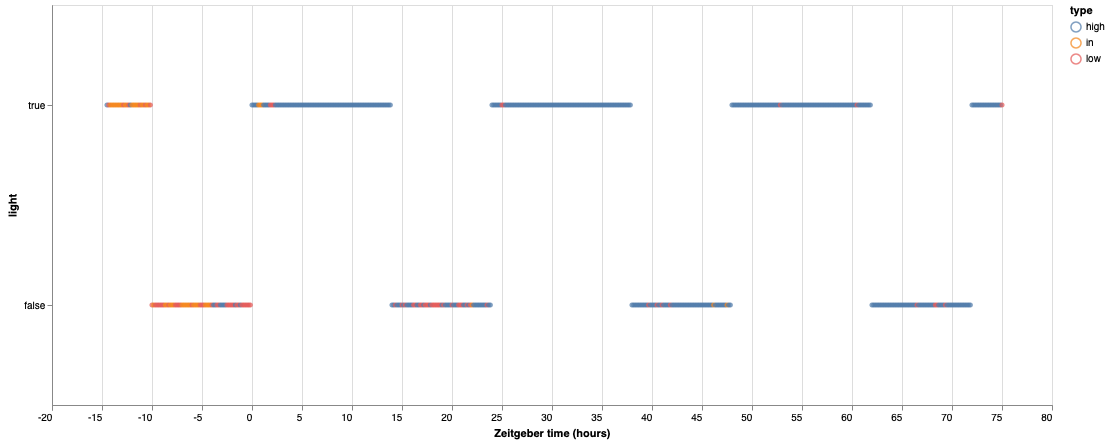

In [84]:
alt.Chart(df.loc[df['location']==1, :], height = 400, width = 1000
         ).mark_point(size =10
         ).encode(
             x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
             y=alt.Y('light:N', sort = [True, False]),
             color ='type:N',
             order = 'zeit:Q'
         )
            

In [91]:
# Average the activity over all locations of a given genotype
average_df = df.groupby(['genotype', 'zeit_ind']).mean().reset_index()

# location columns is irrelavant
del average_df['location']

average_df.head()


    

,genotype,zeit_ind,activity,zeit,day,light
0,het,-869,17.921569,-14.500000,4.0,True
1,het,-860,7.900000,-14.333333,4.0,True
2,het,-850,4.891176,-14.166667,4.0,True
3,het,-840,4.041176,-14.000000,4.0,True
4,het,-830,1.411765,-13.833333,4.0,True


In [108]:
average_df['type'] = average_df.apply(label_activity, axis = 1)
average_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,17.921569,-14.500000,4.0,True,high
1,het,-860,7.900000,-14.333333,4.0,True,low
2,het,-850,4.891176,-14.166667,4.0,True,low
3,het,-840,4.041176,-14.000000,4.0,True,low
4,het,-830,1.411765,-13.833333,4.0,True,low


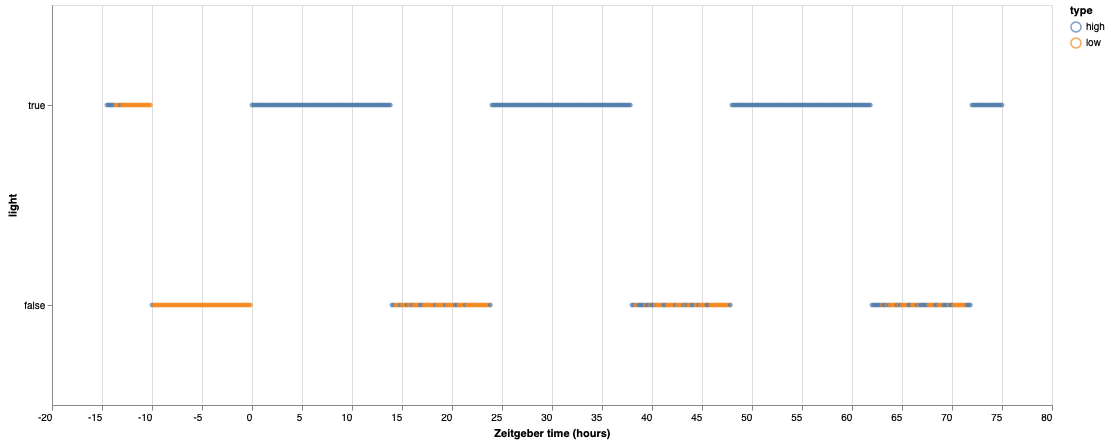

In [109]:
# plot the activity type for wt through light/dark cycle
alt.Chart(average_df.loc[average_df['genotype']=='wt', :], height = 400, width = 1000
         ).mark_point(size =8
         ).encode(
             x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
             y=alt.Y('light:N', sort = [True, False]),
             color ='type:N',
             order = 'zeit:Q'
         )
            

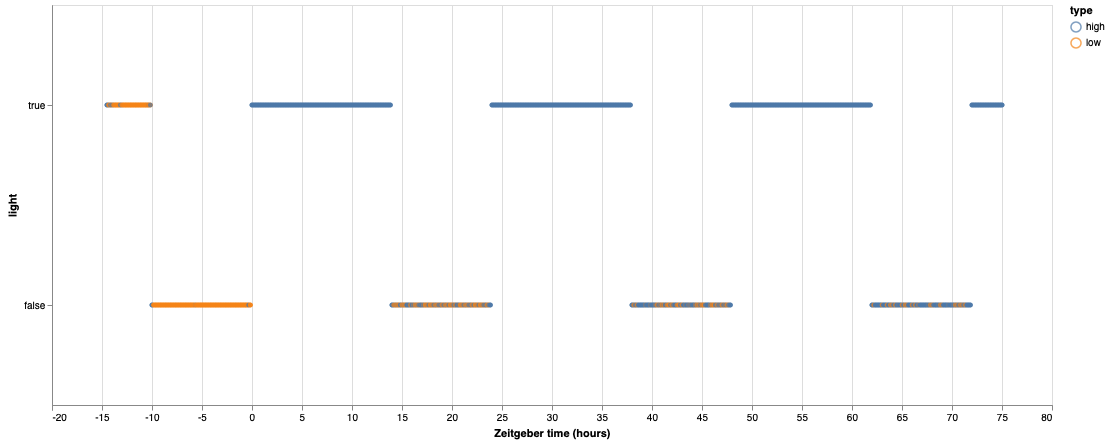

In [128]:
# plot the activity type through light/dark cycle
alt.Chart(average_df, height = 400, width = 1000
         ).mark_point(size =8
         ).encode(
             x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
             y=alt.Y('light:N', sort = [True, False]),
             color ='type:N',
             order = 'zeit:Q'
         )
            

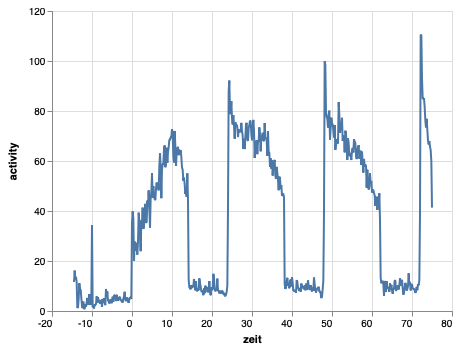

In [110]:
inds1 = average_df['genotype'] == 'wt'

alt.Chart(average_df.loc[inds1,:]
         ).mark_line(
            strokeJoin = 'bevel'
         ).encode(
            x = alt.X('zeit:Q'),
            y = 'activity:Q',
            order = 'zeit:Q',
            
         ) 

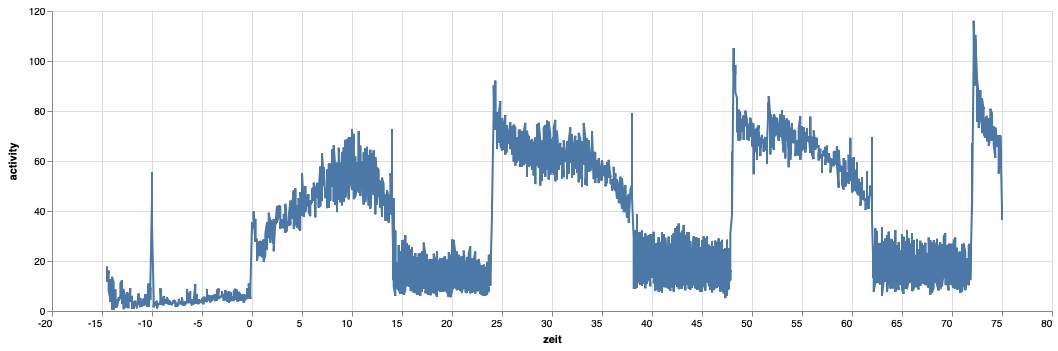

In [126]:
alt.Chart(average_df, width = 1000
         ).mark_line(
            strokeJoin = 'bevel'
         ).encode(
            x = alt.X('zeit:Q'),
            y = 'activity:Q',
            order = 'zeit:Q',
            
         ) 

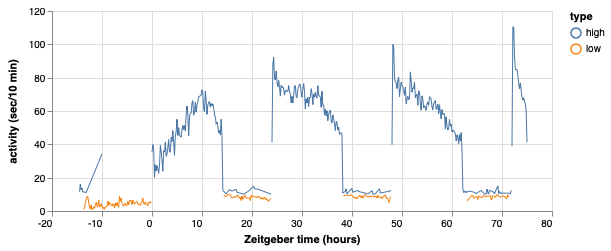

In [114]:
def plot_trace_type(c, col='activity', units='sec/min'):
    """Plot a trace, coloring by activitytype."""
    charts = []
    for day, type in itertools.product(c['day'].unique(), 
                                        c['type'].unique()):
        inds = ( (c['genotype'] == 'wt') 
                & (c['day'] == day) 
                & (c['type'] == type))

        charts.append(
            alt.Chart(c.loc[inds, ['zeit', col, 'type']],
                  height=200,
                  width=500
                ).mark_line(
                    strokeWidth=1,
                    strokeJoin='bevel'
                ).encode(
                    x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
                    y=alt.Y(f'{col}:Q', title=f'activity ({units})'),
                    color='type:N',
                    order='zeit:Q'
            )
        )

    return alt.layer(*charts)

plot_trace_type(average_df, col='activity', units='sec/10 min')

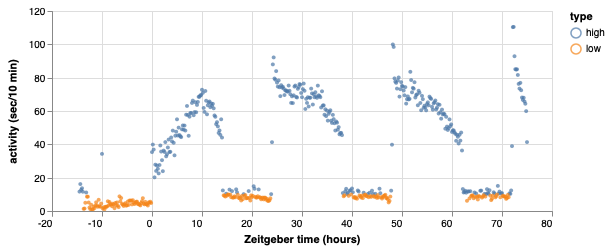

In [117]:
def plot_trace_type(c, col='activity', units='sec/min'):
    """Plot a trace, coloring by activitytype."""
    charts = []
    for day, type in itertools.product(c['day'].unique(), 
                                        c['type'].unique()):
        inds = ( (c['genotype'] == 'wt') 
                & (c['day'] == day) 
                & (c['type'] == type))

        charts.append(
            alt.Chart(c.loc[inds, ['zeit', col, 'type']],
                  height=200,
                  width=500
                ).mark_point(size =4
                ).encode(
                    x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
                    y=alt.Y(f'{col}:Q', title=f'activity ({units})'),
                    color='type:N',
                    order='zeit:Q'
            )
        )

    return alt.layer(*charts)

plot_trace_type(average_df, col='activity', units='sec/10 min')



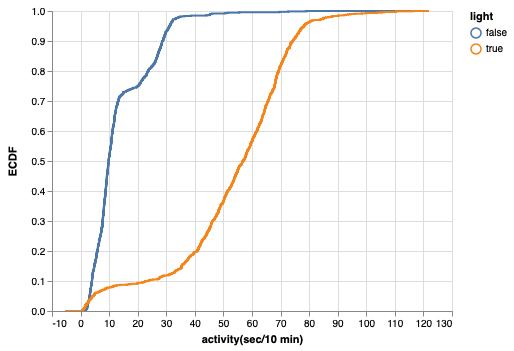

In [124]:
altcat.catplot(data=average_df,
               mark='line',
               encoding=dict(x = alt.X('activity:Q', title='activity(sec/10 min)'),
                             color = alt.Color('light:N')),
               transform = 'ecdf')

In [141]:
average_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,17.921569,-14.500000,4.0,True,high
1,het,-860,7.900000,-14.333333,4.0,True,low
2,het,-850,4.891176,-14.166667,4.0,True,low
3,het,-840,4.041176,-14.000000,4.0,True,low
4,het,-830,1.411765,-13.833333,4.0,True,low


AttributeError: ("'str' object has no attribute 'shift'", 'occurred at index 0')